In [25]:
import pandas as pd
import jieba
from tkinter import _flatten
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [10]:
with open('stoplist.txt', 'r', encoding='utf-8') as f:
    stopWords = f.read()
stopWords = ['\n', '', ' '] + stopWords.split()

In [14]:
stopWords

['\n',
 '',
 ' ',
 '\ufeff',
 '说',
 '人',
 '元',
 'hellip',
 '&',
 ',',
 '?',
 '、',
 '。',
 '"',
 '"',
 '《',
 '》',
 '！',
 '，',
 '：',
 '；',
 '？',
 '""',
 '的',
 '了',
 '人民',
 '末',
 '啊',
 '阿',
 '哎',
 '哎呀',
 '哎哟',
 '唉',
 '俺',
 '俺们',
 '按',
 '按照',
 '吧',
 '吧哒',
 '把',
 '罢了',
 '被',
 '本',
 '本着',
 '比',
 '比方',
 '比如',
 '鄙人',
 '彼',
 '彼此',
 '边',
 '别',
 '别的',
 '别说',
 '并',
 '并且',
 '不比',
 '不成',
 '不单',
 '不但',
 '不独',
 '不管',
 '不光',
 '不过',
 '不仅',
 '不拘',
 '不论',
 '不怕',
 '不然',
 '不如',
 '不特',
 '不惟',
 '不问',
 '不只',
 '朝',
 '朝着',
 '趁',
 '趁着',
 '乘',
 '冲',
 '除',
 '除此之外',
 '除非',
 '除了',
 '此',
 '此间',
 '此外',
 '从',
 '从而',
 '打',
 '待',
 '但',
 '但是',
 '当',
 '当着',
 '到',
 '得',
 '的',
 '的话',
 '等',
 '等等',
 '地',
 '第',
 '叮咚',
 '对',
 '对于',
 '多',
 '多少',
 '而',
 '而况',
 '而且',
 '而是',
 '而外',
 '而言',
 '而已',
 '尔后',
 '反过来',
 '反过来说',
 '反之',
 '非但',
 '非徒',
 '否则',
 '嘎',
 '嘎登',
 '该',
 '赶',
 '个',
 '各',
 '各个',
 '各位',
 '各种',
 '各自',
 '给',
 '根据',
 '跟',
 '故',
 '故此',
 '固然',
 '关于',
 '管',
 '归',
 '果然',
 '果真',
 '过',
 '哈',
 '哈哈',
 '呵',
 '和',
 '何',
 '何处',
 '何况',
 '何

In [2]:
data = pd.read_csv('douban.csv', encoding='GB18030')
dataCut = data['短评正文'].apply(jieba.lcut)  # 分词

In [37]:
def my_word_cloud(data=None, stopWords=None, img=None):
    dataCut = data.apply(jieba.lcut)  # 分词
    dataAfter = dataCut.apply(lambda x: [i for i in x if i not in stopWords])  # 去除停用词
    wordFre = pd.Series(_flatten(list(dataAfter))).value_counts()  # 统计词频
    mask = plt.imread(img)
    wc.fit_words(wordFre)
    plt.imshow(wc)
    plt.axis('off')

In [38]:
index_negative = data['评分'] < 30      # 差评数据的索引
index_positive = data['评分'] >= 30     # 好评数据的索引

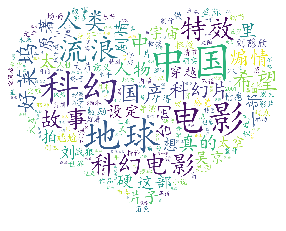

In [39]:
my_word_cloud(data=data['短评正文'][index_positive], stopWords=stopWords, img='aixin.jpg')   # 好评数据的词云

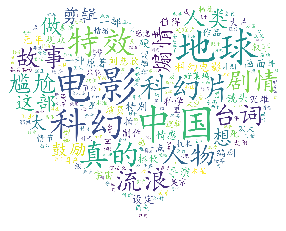

In [40]:
my_word_cloud(data=data['短评正文'][index_negative], stopWords=stopWords, img='aixin.jpg')  # 差评数据的词云

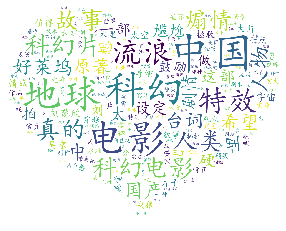

In [41]:
my_word_cloud(data=data['短评正文'], stopWords=stopWords, img='aixin.jpg')  # 整体评论数据的词云